In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1afd0588>]],
      dtype=object)

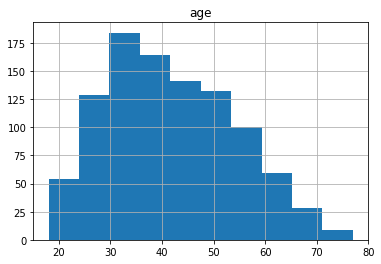

In [9]:
df.hist(column='age', bins=10)

In [10]:
df.columns


Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [12]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values

In [13]:
print(X)

[[ 2. 13. 44. ...  0.  0.  2.]
 [ 3. 11. 33. ...  0.  0.  6.]
 [ 3. 68. 52. ...  0.  1.  2.]
 ...
 [ 3. 67. 59. ...  0.  1.  1.]
 [ 3. 70. 49. ...  0.  1.  1.]
 [ 3. 50. 36. ...  0.  1.  3.]]


In [15]:
y = df['custcat'].values

In [16]:
print(y[0:15])

[1 4 3 1 3 3 2 4 3 2 1 3 1 4 1]


Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X)

[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 11) (700,)
Test set: (300, 11) (300,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
knnclassifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knnclassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [30]:
ypred = knnclassifier.predict(X_test)
ypred[0:10]


array([3, 1, 3, 2, 4, 3, 3, 2, 2, 4])

In [31]:
y_test[0:10]

array([4, 1, 1, 2, 4, 4, 3, 1, 3, 4])

In [33]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knnclassifier.predict(X_train)))

Train set Accuracy:  0.5371428571428571


In [34]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred))

Test set Accuracy:  0.33


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.28      , 0.27333333, 0.30666667, 0.33      , 0.34      ,
       0.31666667, 0.34      , 0.31666667, 0.32666667])

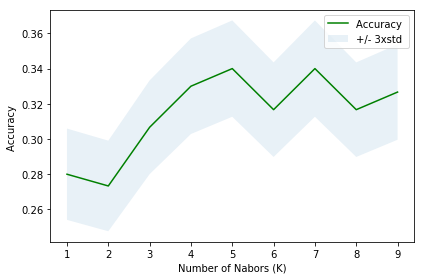

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [39]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 5
